# Predicting the sentimental analysis of hotel reviews

In [77]:
# Importing essential libraries
import numpy as np
import pandas as pd
# Importing essential libraries for performing Natural Language Processing on 'hotel_Reviews.csv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Cleaning the reviews
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokulakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokulakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
# Loading the dataset
df = pd.read_csv("./data/hotel-reviews.csv",encoding= 'unicode_escape')

In [71]:
df.shape

(2025, 5)

In [72]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [73]:
df=df.drop(["User_ID", "Browser_Used", "Device_Used"],axis=1)

In [74]:
df.columns

Index(['Description', 'Is_Response'], dtype='object')

In [75]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,My girlfriends and I stayed here to celebrate ...,not happy
4,My husband and I have stayed in this hotel a f...,not happy


Text(0, 0.5, 'Frequency')

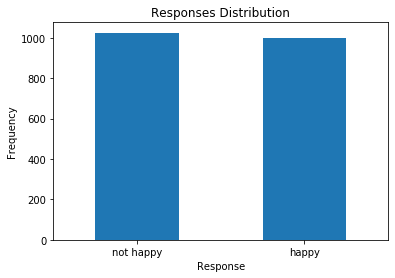

In [93]:
count_classes = pd.value_counts(df['Is_Response'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

Response=["not happy","happy"]

plt.title("Responses Distribution")

plt.xticks(range(2), Response)

plt.xlabel("Response")

plt.ylabel("Frequency")

In [94]:
# Checking for null values
df.isnull().values.any()

False

In [76]:
corpus = []
for j in range(0,len(df["Description"])):

  # Cleaning special character from the reviews
  #review = re.sub('[''""_]','',string=df["Description"][j])
  #review = re.sub('\n','',string=df["Description"][j])
  #review = re.sub('\[.*?\]','',string=df["Description"][j])
  #review = re.sub('[%s]'% re.escape(string.punctuation),'',string=df["Description"][j])
  #review =re.sub('\w*\d\w*','',string=df["Description"][j])
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df["Description"][j])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()


  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  #ps = PorterStemmer()
  ps = WordNetLemmatizer()
  #review = [ps.stem(word) for word in review_words]
  review = [ps.lemmatize(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [111]:
# Train and Test split
#cvec=CountVectorizer(max_features=1500)
cvec=TfidfVectorizer()
#X = cv.fit_transform(corpus).toarray()
x=cvec.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values
#y=df["Is_Response"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [112]:
# pipeline with model and vectorizer
#cvec=CountVectorizer(max_features=1500)
#cvec=TfidfVectorizer()
clf =LogisticRegression()
#clf=MultinomialNB()
#clf=RandomForestClassifier(n_estimators=210)
#model = Pipeline([('vectorizer',cvec),('classifier',clf)])

clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
# Predicting the Test set results
y_pred = clf.predict(x_test)

In [114]:
# prediciting the test score
score = accuracy_score(y_test, y_pred)
score

0.8592592592592593

In [115]:
# Accuracy, Precision and Recall
print(metrics.classification_report(y_test,y_pred, labels= df.Is_Response, target_names=df['Is_Response'].unique()))

              precision    recall  f1-score   support

   not happy       0.86      0.87      0.86       208
       happy       0.86      0.87      0.86       208

    accuracy                           0.86    410200
   macro avg       0.86      0.86      0.86    410200
weighted avg       0.86      0.86      0.86    410200



C:\Users\gokulakrishnan\Desktop\hotels_review_project\env\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: labels size, 2025, does not match size of target_names, 2
  report += '\n'


In [116]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[167,  30],
       [ 27, 181]], dtype=int64)

Text(33.0, 0.5, 'Actual values')

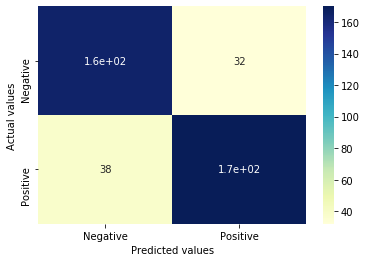

In [107]:
# Plotting the confusion matrix

plt.figure()
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [163]:
# hypertuning logistic regression
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(10,100,10):
  temp_classifier = LogisticRegression(max_iter=i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Users\gokulakrishnan\Desktop\hotels_review_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  combination of L1 and L2.


Accuracy score for alpha=10 is: 83.46%


C:\Users\gokulakrishnan\Desktop\hotels_review_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  combination of L1 and L2.


Accuracy score for alpha=20 is: 85.93%


C:\Users\gokulakrishnan\Desktop\hotels_review_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  combination of L1 and L2.


Accuracy score for alpha=30 is: 85.93%


C:\Users\gokulakrishnan\Desktop\hotels_review_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  combination of L1 and L2.


Accuracy score for alpha=40 is: 85.93%
Accuracy score for alpha=50 is: 85.93%
Accuracy score for alpha=60 is: 85.93%
Accuracy score for alpha=70 is: 85.93%
Accuracy score for alpha=80 is: 85.93%
Accuracy score for alpha=90 is: 85.93%
--------------------------------------------
The best accuracy is 85.93% with alpha value as 20


In [161]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cvec.transform([final_review]).toarray()

  #temp = cvec.transform([final_review])
  return clf.predict(temp)
  


In [158]:
# Predicting values
sample_review = "The food is really great here"

if predict_sentiment(sample_review)=="happy":
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [160]:
# Predicting values
sample_review = "Food was pretty bad and the service was very slow."

if predict_sentiment(sample_review)=="happy":
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
